# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
Per testare il generatore di numeri causali sono state calcolate le seguenti grandezze:
\begin{equation}
    \langle r \rangle = \int_0^1 r dr = 1/2 \qquad \sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12
\end{equation}
Dove $r$ è un numero estratto casualmente tra $0$ e $1$.
Sia per ottenere il valore di $\langle r \rangle$ che di $\sigma^2$, è stata utilizzata la media a blocchi, con $100000$ lanci e $100$ blocchi. Questa è una tecnica utilizzata per ottenere una stima più accurata della media di un insieme di dati, e viene calcolata nel seguente modo: si divide l'intero set di dati in blocchi di dimensioni uguali, in modo che ogni blocco contenga un certo numero di dati consecutivi, succesivamente, per ogni blocco, si calcola la media dei dati contenuti in quel blocco, si procede poi calcolando una media progressiva che include, in successione, il secondo blocco unitamente al primo, il terzo insieme ai primi due, e così via, fino a incorporare gradualmente tutti i blocchi disponibili.

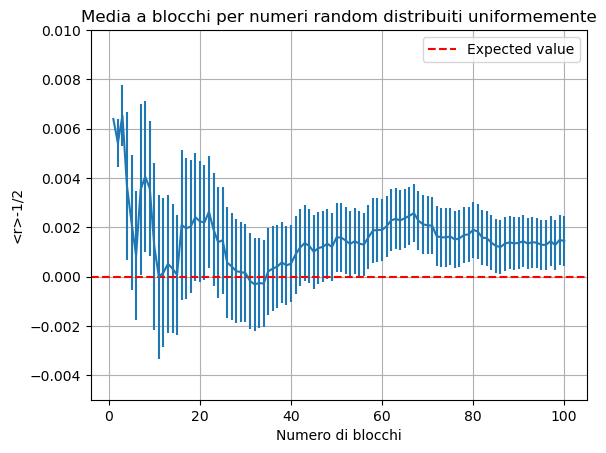

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def read_data_from_file(filename):
    with open(filename, 'r') as file:  # Modalità "r" per la lettura
        first_line = file.readline()
        num_columns = len(first_line.split())

    # Inizializza una lista di liste vuote per memorizzare i dati di ciascuna colonna
    data = [[] for _ in range(num_columns)]

    with open(filename, 'r') as file:  # Riapre il file per leggere tutti i dati
        for line in file:
            values = line.split()
            for i in range(num_columns):
                data[i].append(float(values[i]))
    
    return data

# Chiamata alla funzione per leggere i dati dal file
n, medie, var, sigma2, err, chi2 = read_data_from_file("ris.dat")
sigma2 = np.array(sigma2) 

plt.errorbar(n, np.array(medie)-0.5, yerr=np.array(var))
plt.title('Media a blocchi per numeri random distribuiti uniformemente')
plt.xlabel('Numero di blocchi')
plt.ylim(-0.005, 0.01)
plt.ylabel('<r>-1/2')
plt.axhline(y=0, color='r', linestyle='--', label='Valore aspettato')
plt.legend()
plt.grid(True)
plt.show()

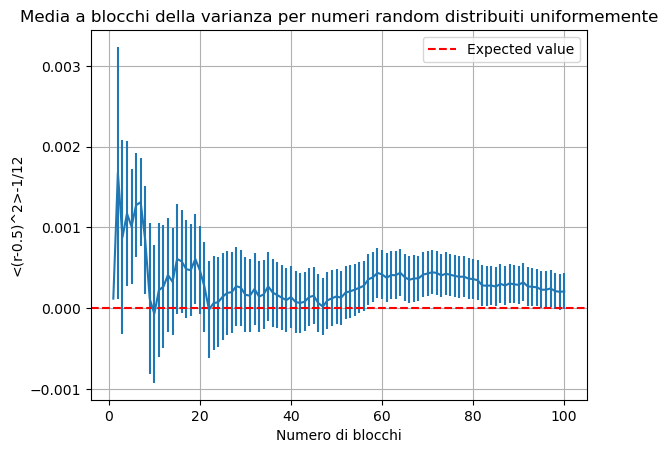

In [3]:
plt.errorbar(n,sigma2-1/12,yerr=err)
plt.title('Media a blocchi della varianza per numeri random distribuiti uniformemente')
plt.xlabel('Numero di blocchi')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.axhline(y=0, color='r', linestyle='--', label='Expected value')
plt.legend()
plt.grid(True)
plt.show()

Quello che stiamo ipotizzando è che i numeri sono estratti da una distribuzione uniforme. In statistica però, noi non possiamo dimostrare
che determinati eventi randomici arrivano da una particolare distribuzione, ma possiamo solo provare a stimare la probabilità che i numeri non
sono stati estratti da una distribuzione uniforme. Se questa probabilità risulta essere bassa, allora possiamo rigettare l'ipotesi.

Il test del chi quadro $\chi^2$, è una misura dell'errore tra i dati osservati, $O_i$, e i valori aspettati, $E_i$. Si calcola nel seguente modo:
\begin{equation}
    \chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}
\end{equation}

Nella cella sottostante viene mostrato l'istogramma del $\chi^2$ ottenuto dividendo l'intervallo $[0,1]$ in $M=100$ intervalli identici, ed usando $n=10000$ numeri generati randomicamente come numero di lanci. In questo caso abbiamo che:
\begin{equation}
    \chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}
\end{equation}

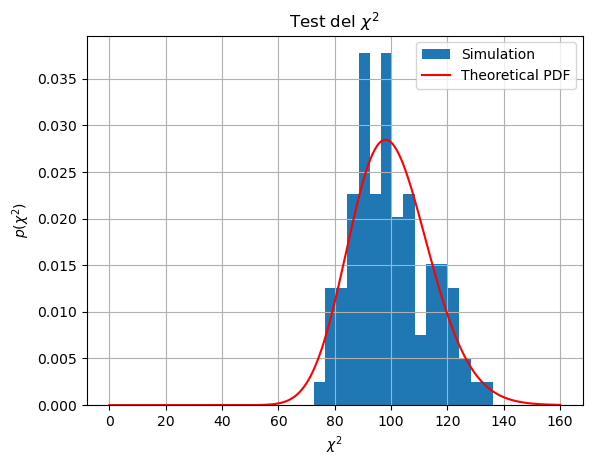

In [4]:
import scipy.special as spec

def chi_pdf(x, dof):

    norm = 2**(dof/2) * spec.gamma(dof/2)
    pdf = (x**(dof/2 - 1) * np.exp(-x/2)) / norm
    return pdf

# Create figure and axis
fig, ax = plt.subplots(1, 1)

# Plot histogram of data
ax.hist(chi2, bins=40, density=True, range=(1, 160), label='Simulation')

# Generate x-values for theoretical PDF
x = np.linspace(0, 160, 400)  # 400 points for a smoother curve

# Compute theoretical PDF values using chi_pdf function
pdf = chi_pdf(x, dof=100) 

# Plot theoretical PDF
ax.plot(x, pdf, color="red", label="Theoretical PDF")

# Set labels and title for the plot
ax.set_xlabel('$\chi^2$')
ax.set_ylabel('$p (\chi^2)$')
ax.set_title('Test del $\chi^2$')

# Add grid lines to the plot
ax.grid(True)

# Add legend to the plot
ax.legend()

# Show the plot
plt.show()


### Exercise 01.2
Tramite questo esercizio andiamo a verificare il teorema del limite centrale, per diversi tipi di distribuzioni. Quello che è stato
fatto è usare il metodo dell'inversione della distribuzione cumulativa per campionare le varie densità di probabilità. Oltre all'uniforme
sono state usate la distribuzione esponenziale:
\begin{equation}
    p(x) = \lambda \exp(-\lambda x) \qquad x\in [0;+\infty]
\end{equation}
e la distribuzione di Cauchy-Lorentz:
\begin{equation}
    p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2} \qquad x\in [-\infty;+\infty]
\end{equation}
Nelle celle seguenti possiamo vedere gli istogrammi ottenuti riempiendoli con $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N=1, 2, 10, 100$), dove $x_i$ è una variabile casuale campionata lanciando un dado standard, un dado esponenziale (con $\lambda=1$) e un dado Lorentziano (con $\mu=0$ e $\Gamma=1$).

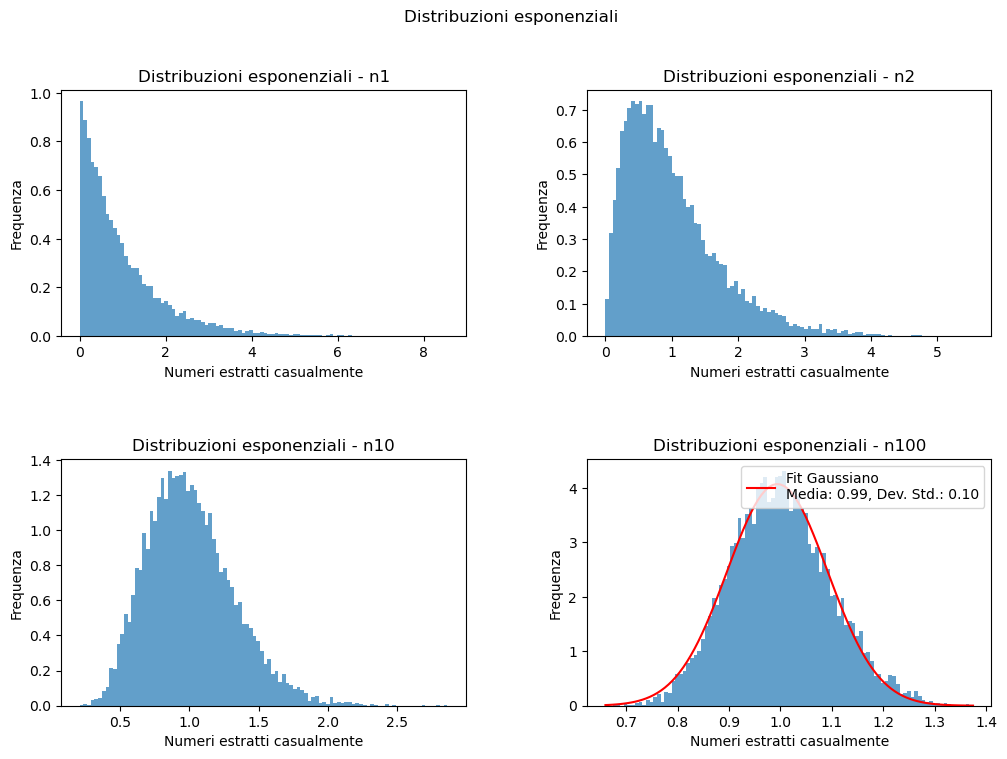

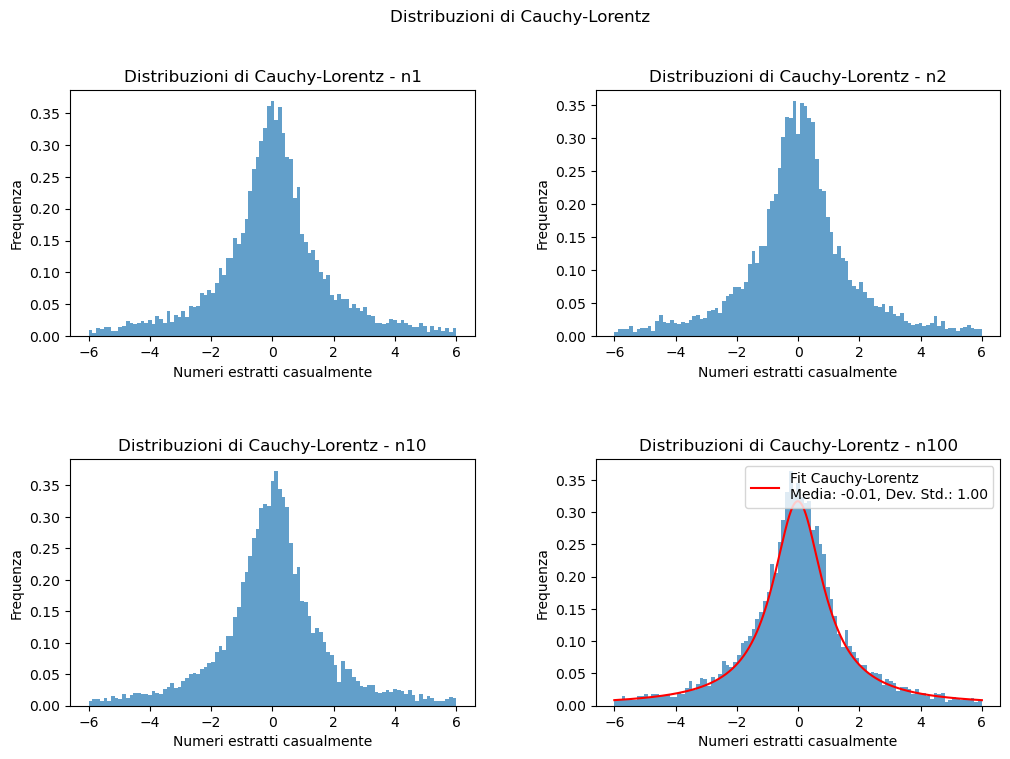

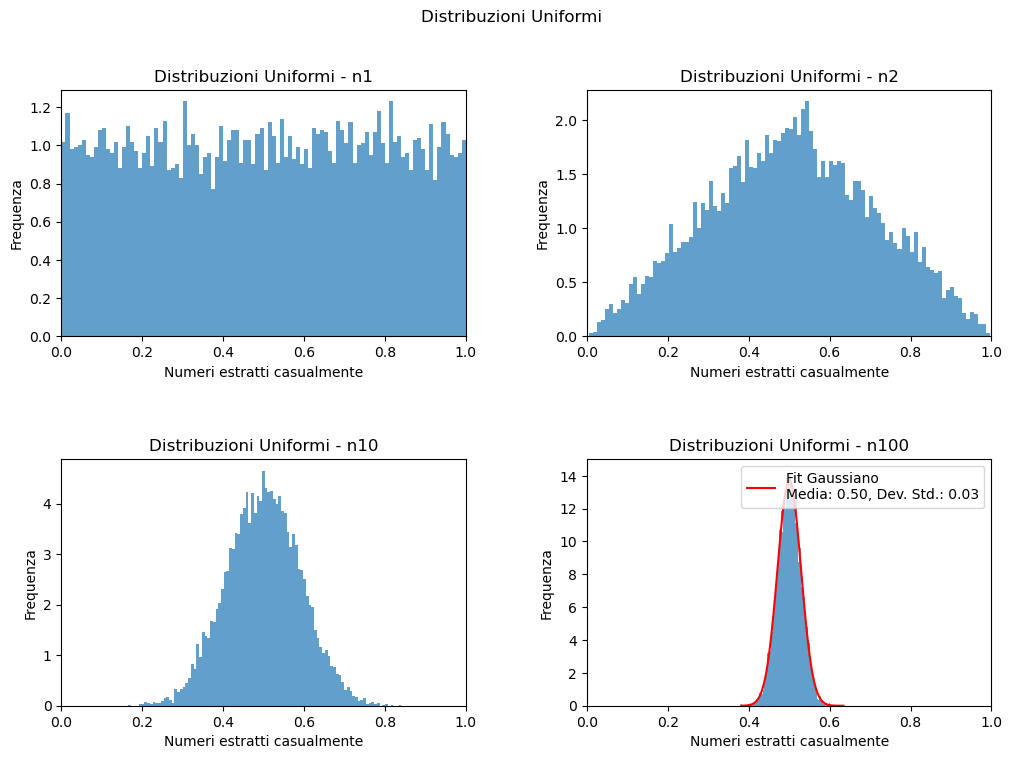

In [5]:
from scipy.optimize import curve_fit
from scipy.stats import cauchy

#Caricamento dei dati

n, medie_rannyu_n1, medie_exp_n1, medie_CL_n1 = read_data_from_file("n1.dat")
n, medie_rannyu_n2, medie_exp_n2, medie_CL_n2 = read_data_from_file("n2.dat")
n, medie_rannyu_n10, medie_exp_n10, medie_CL_n10 = read_data_from_file("n10.dat")
n, medie_rannyu_n100, medie_exp_n100, medie_CL_n100 = read_data_from_file("n100.dat")

medie_exp = [medie_exp_n1, medie_exp_n2, medie_exp_n10, medie_exp_n100]
medie_CL = [medie_CL_n1, medie_CL_n2, medie_CL_n10, medie_CL_n100]
medie_rannyu = [medie_rannyu_n1, medie_rannyu_n2, medie_rannyu_n10, medie_rannyu_n100]
labels = ['n1', 'n2', 'n10', 'n100']

# Definizione degli array per i bin personalizzati della distribuzione di Cauchy-Lorentz
x_cl = np.linspace(-6, 6, 10000)
bins_cl = np.linspace(-6, 6, 100)

# Funzione di Gauss per il fit dell'esponenziale e dell'uniforme
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)

# Creazione delle figure e dei subplot
fig_exp, axs_exp = plt.subplots(2, 2, figsize=(12, 8))
fig_cl, axs_cl = plt.subplots(2, 2, figsize=(12, 8))
fig_rannyu, axs_rannyu = plt.subplots(2, 2, figsize=(12, 8))

# Aggiustamento degli spazi tra i subplot per evitare sovrapposizioni
fig_exp.subplots_adjust(hspace=0.5, wspace=0.3)
fig_cl.subplots_adjust(hspace=0.5, wspace=0.3)
fig_rannyu.subplots_adjust(hspace=0.5, wspace=0.3)

# Creazione di una lista di subplot per iterare facilmente
axs_list = [axs_exp, axs_cl, axs_rannyu]
titles = ['Distribuzioni esponenziali', 'Distribuzioni di Cauchy-Lorentz', 'Distribuzioni Uniformi']
data_list = [medie_exp, medie_CL, medie_rannyu]

# Iterazione attraverso i dati e creazione degli istogrammi nei subplot corrispondenti
for axs, data, title in zip(axs_list, data_list, titles):
    for ax, medie, label in zip(axs.flatten(), data, labels):
        if title == 'Distribuzioni di Cauchy-Lorentz':
            ax.hist(medie, bins=bins_cl, density=True, alpha=0.7)  # Utilizza i bin personalizzati per Cauchy-Lorentz
        else:
            ax.hist(medie, bins=100, density=True, alpha=0.7)  # Density=True per normalizzare l'istogramma
        ax.set_title(f'{title} - {label}')  
        ax.set_xlabel('Numeri estratti casualmente')  
        ax.set_ylabel('Frequenza')  
        if title == 'Distribuzioni Uniformi':  
            ax.set_xlim(0, 1)  
    
        if title == 'Distribuzioni esponenziali' and label == 'n100':
            # Esegui il fit gaussiano per la distribuzione esponenziale con n100
            bins, edges = np.histogram(medie, bins=100, density=True)
            centers = (edges[:-1] + edges[1:]) / 2
            popt, pcov = curve_fit(gaussian, centers, bins, p0=[1, np.mean(medie), np.std(medie)])

            # Plot del fit sopra l'istogramma
            x_fit = np.linspace(min(medie), max(medie), 100)
            y_fit = gaussian(x_fit, *popt)
            ax.plot(x_fit, y_fit, color='red')

            # Creazione di linee fittizie per la legenda
            line1 = plt.Line2D([0], [0], color='red', linewidth=1.5, label=f'Fit Gaussiano\nMedia: {popt[1]:.2f}, Dev. Std.: {popt[2]:.2f}')
            ax.legend(handles=[line1])

        elif title == 'Distribuzioni Uniformi' and label == 'n100':
            # Esegui il fit gaussiano per la distribuzione uniforme con n100
            bins, edges = np.histogram(medie, bins=100, density=True)
            centers = (edges[:-1] + edges[1:]) / 2
            popt, pcov = curve_fit(gaussian, centers, bins, p0=[1, np.mean(medie), np.std(medie)])

            # Plot del fit sopra l'istogramma
            x_fit = np.linspace(min(medie), max(medie), 100)
            y_fit = gaussian(x_fit, *popt)
            ax.plot(x_fit, y_fit, color='red')

            # Creazione di linee fittizie per la legenda
            line1 = plt.Line2D([0], [0], color='red', linewidth=1.5, label=f'Fit Gaussiano\nMedia: {popt[1]:.2f}, Dev. Std.: {popt[2]:.2f}')
            ax.legend(handles=[line1])

        elif title == 'Distribuzioni di Cauchy-Lorentz' and label == 'n100':
            # Esegui il fit della distribuzione di Cauchy-Lorentz
            params = cauchy.fit(medie)

            # Plot del fit sopra l'istogramma
            y_fit = cauchy.pdf(x_cl, *params)
            ax.plot(x_cl, y_fit, color='red')

            # Creazione di linee fittizie per la legenda
            line1 = plt.Line2D([0], [0], color='red', linewidth=1.5, label=f'Fit Cauchy-Lorentz\nMedia: {params[0]:.2f}, Dev. Std.: {params[1]:.2f}')
            ax.legend(handles=[line1])

# Aggiungi il titolo generale alle figure
fig_exp.suptitle('Distribuzioni esponenziali')
fig_cl.suptitle('Distribuzioni di Cauchy-Lorentz')
fig_rannyu.suptitle('Distribuzioni Uniformi')

# Mostra le figure
plt.show()


### Exercise 01.3
In questo esercizio viene simulato l'esperimento di Buffon. Quest'ultimo consiste nel lanciare casualmente una sbarretta di lunghezza $L$
su un piano orizzontale, segnato con linee rette distanti $d$ l'una dall'altra. La probabilità $P$ che la sbarretta intersechi una di queste linee è: $P = \frac{2L}{\pi d}$. Questo può essere usato per valutare $\pi$ dai lanci della sbarretta: se la sbarretta viene lanciata $N_{thr}$ volte e si osserva che atterra su una linea $N_{hit}$ di quelle volte, possiamo stimare $\pi$ da $$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Questo è stato fatto in più modi, il primo è il seguente:
- viene generata una posizione iniziale $x_i$ per la sbarretta tra $0$ e $d$
- viene generato un $dx$ moltiplicando la lunghezza della sbarretta per un numero generato come un coseno di un numero generato tra $0$ e un numero molto grande, questo per non utilizzare $\pi$
- viene trovata la lunghezza finale come $x_f=x_i+dx$
- se $x_f<0$ oppure $x_f>d$ viene incrementato il contatore

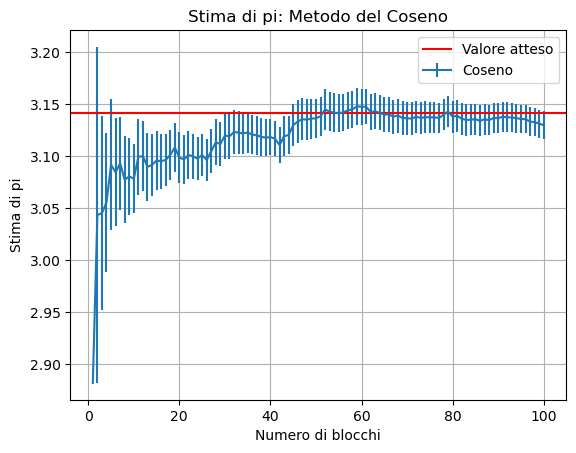

In [8]:
import math

# Legge i dati dai file
n, pi_cos, err_cos, pi_hom, err_hom, pi_con_pi, err_pi_con_pi = read_data_from_file('pi.dat')

# Crea i grafici per i tre metodi di calcolo di pi

# Grafico per il metodo con il coseno
plt.errorbar(n, pi_cos, yerr=err_cos, label='Coseno')

# Imposta il titolo, le etichette degli assi e la griglia
plt.title('Stima di pi: Metodo del Coseno')
plt.xlabel('Numero di blocchi')
plt.ylabel('Stima di pi')
plt.axhline(y=math.pi, color = "red", label = "Valore atteso")
plt.legend()
plt.grid(True)
plt.show()

Il secondo metodo utilizzato è stato questo:
- viene generata la posizione del centro $x_c$ della sbarretta tra $0$ e $d$
- vengono generate due coordinate $x$ e $y$ finchè queste non cadono all'interno della semicirconferenza unitaria positiva
- viene calcolato l'angolo come l'arccoseno del rapporto tra $x$ e la distanza dall'origine
- vengono calcolate le estremità della sbarretta tramite $x_c$, l'angolo e la lunghezza della sbaretta
- se $x_i$ o $x_f$ sono minori di $0$ o maggiori di $d$, viene aumentato il contatore

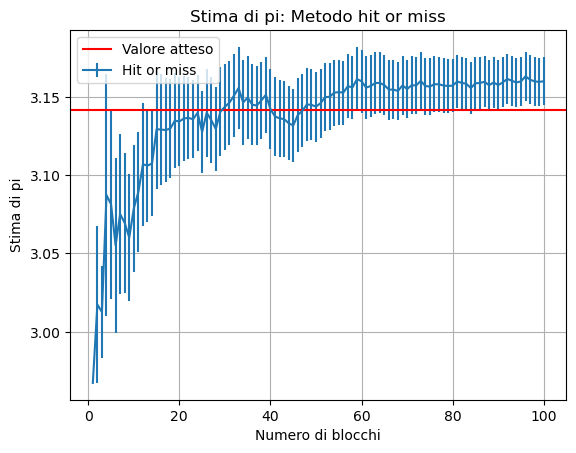

In [9]:
# Grafico per il metodo delle hit or miss
plt.errorbar(n, pi_hom, yerr=err_hom, label='Hit or miss')

# Imposta il titolo, le etichette degli assi e la griglia
plt.title('Stima di pi: Metodo hit or miss')
plt.xlabel('Numero di blocchi')
plt.ylabel('Stima di pi')
plt.axhline(y=math.pi, color = "red", label = "Valore atteso")
plt.legend()
plt.grid(True)
plt.show()

Il terzo metodo utilizzato invece ha fatto uso di $\pi$, infatti la stima è stata fatta nel seguente modo:
- viene generata la posizione del centro $x_c$ della sbarretta tra $0$ e $d$
- viene generato un angolo tra $-\pi/2$ e $\pi/2$
- vengono calcolate le estremità della sbarretta tramite $x_c$, il coseno dell'angolo e la lunghezza della sbaretta
- se $x_i$ è minore di $0$ o $x_f$ è maggiore di $d$, viene aumentato il contatore

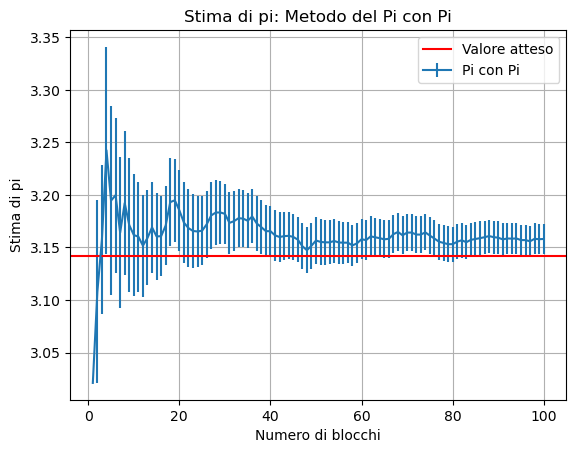

In [10]:
# Grafico per il metodo del pi con pi
plt.errorbar(n, pi_con_pi, yerr=err_pi_con_pi, label='Pi con Pi')

# Imposta il titolo, le etichette degli assi e la griglia
plt.title('Stima di pi: Metodo del Pi con Pi')
plt.xlabel('Numero di blocchi')
plt.ylabel('Stima di pi')
plt.axhline(y=math.pi, color = "red", label = "Valore atteso")
plt.legend()
plt.grid(True)
plt.show()

Nel grafico seguente vengono mostrati i vari grafici dei metodi precedenti sovrapposti

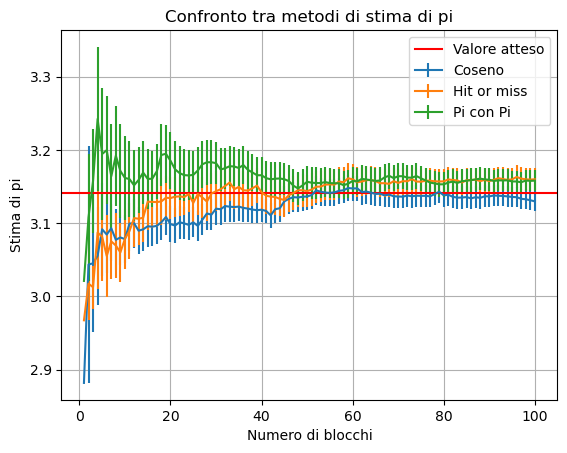

In [11]:
# Grafico sovrapposto per tutti e tre i metodi
plt.errorbar(n, pi_cos, yerr=err_cos, label='Coseno')
plt.errorbar(n, pi_hom, yerr=err_hom, label='Hit or miss')
plt.errorbar(n, pi_con_pi, yerr=err_pi_con_pi, label='Pi con Pi')

# Imposta il titolo, le etichette degli assi e la griglia
plt.title('Confronto tra metodi di stima di pi')
plt.xlabel('Numero di blocchi')
plt.ylabel('Stima di pi')
plt.axhline(y=math.pi, color = "red", label = "Valore atteso")
plt.grid(True)
plt.legend()  # Aggiunge la legenda al grafico
plt.show()